# 第二回：艺术画笔见乾坤
原始教程参见 DataWhale 第二十期的组队学习教程,地址: https://github.com/datawhalechina/fantastic-matplotlib     
2020.12.18 打卡

## 一、概述

### 1. matplotlib的三层api
matplotlib的原理或者说基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。  
就和人作画的步骤类似：  
1. 准备一块画布或画纸
2. 准备好颜料、画笔等制图工具
3. 作画
    
所以matplotlib有三个层次的API：  
  
`matplotlib.backend_bases.FigureCanvas` 代表了绘图区，所有的图像都是在绘图区完成的  
`matplotlib.backend_bases.Renderer` 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。  
`matplotlib.artist.Artist` 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。  
前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，我们95%的时间，都是用来和matplotlib.artist.Artist类打交道的。
####  学习笔记
之前使用过reportlab制作过pdf以及水印文件,基本的过程是先创建一个canvas类型的对象,然后再在上边绘制文字啊曲线阿什么的,类似的,matplotlib的绘图,都是在模仿真实世界中绘画(特别是油画)的过程: 首先准备一块帆布(canvas),然后在合适的地方铺恰当的底色,再在上边合适的位置一层一层地覆盖各种颜色.这种面向对象的模仿过程,在理解上非常自然.


### 2. Artist的分类
Artist有两种类型：`primitives` 和`containers`。   
`primitive`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如**曲线Line2D，文字text，矩形Rectangle，图像image**等。  
`container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**。他们之间的关系如下图所示：  
![分类](https://img-blog.csdnimg.cn/20201122230916134.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zODYwNDk2MQ==,size_16,color_FFFFFF,t_70#pic_center)  


### 3. matplotlib标准用法
matplotlib的标准使用流程为：  
1. 创建一个`Figure`实例
2. 使用`Figure`实例创建一个或者多个`Axes`或`Subplot`实例
3. 使用`Axes`实例的辅助方法来创建`primitive`  

值得一提的是，Axes是一种容器，它可能是matplotlib API中最重要的类，并且我们大多数时间都花在和它打交道上。更具体的信息会在之后容器小节说明。

一个流程示例及说明如下：  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import __version__
__version__ #查看安装的 matplotlib 的版本

'3.3.3'

In [7]:
# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

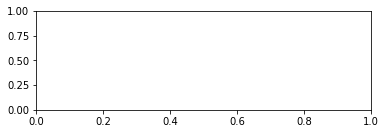

In [8]:
# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

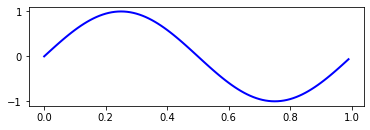

In [9]:
# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

# step 3
# 然后用Axes实例的方法画了一条曲线
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

## 二、自定义你的Artist对象

### 1. Artist属性
在图形中的每一个元素都对应着一个matplotlib `Artist`，且都有其对应的配置属性列表。  
  
`Figure`本身包含一个Rectangle，Rectangle的大小就是Figure的大小；你可以用来设置Figure的背景色和透明度。  
每个`Axes`边界框(默认白底黑边)，也有一个Rectangle，通过它可以设置Axes的颜色、透明度等。  
这些实例都存储在成员变量(member variables) `Figure.patch` 和 `Axes.patch`中。 （*Patch*是一个来源于MATLAB的名词，它是图形上颜色的一个2D*补丁*，包含**rectangels-矩形**，**circles-圆** 和 **plygons-多边形**）
  
换个表达方式：  
Figure.patch属性：是一个Rectangle，代表了图表的矩形框，它的大小就是图表的大小， 并且可以通过它设置figure的背景色和透明度。  
Axes.patch属性：也是一个Rectangle，代表了绘图坐标轴内部的矩形框（白底黑边）， 通过它可以设置Axes的颜色、透明度等。  


每个matplotlib `Artist`都有以下属性：
+ `.alpha`属性：透明度。值为0—1之间的浮点数
+ `.axes`属性：返回这个Artist所属的axes，可能为None
+ `.figure`属性：该Artist所属的Figure，可能为None
+ `.label`：一个text label
+ `.visible`：布尔值，控制Artist是否绘制
  
这里仅列举几个常见的属性，更详细的属性清单请查阅官方文档： [Artist属性列表](https://matplotlib.org/tutorials/intermediate/artists.html#customizing-your-objects)

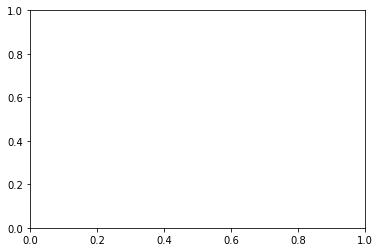

In [12]:
# .patch
plt.figure().patch
plt.axes().patch

### 2. 属性调用方式
Artist对象的所有属性都通过相应的 `get_*` 和 `set_*` 函数进行读写。  
例如下面的语句将alpha属性设置为当前值的一半：
```
a = o.get_alpha()
o.set_alpha(0.5*a)
```

如果想一次设置多个属性，也可以用set方法：
```
o.set(alpha=0.5, zorder=2)
```

可以使用 `matplotlib.artist.getp(o,"alpha")` 来获取属性，如果指定属性名，则返回对象的该属性值；如果不指定属性名，则返回对象的所有的属性和值。

In [13]:
import matplotlib
# Figure rectangle的属性
matplotlib.artist.getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transfo

## 三、基本元素 - primitives
现在我们知道了如何检查和设置给定对象的属性，我们还需要知道如何获取该对象。  
  
前文介绍到，`Artist`包含两种对象：`基本要素-primitives` 和 `容器-containers`。  
`primitives`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如**曲线Line2D，文本text，矩形Rectangle，图像image**等。  
`container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**。    
  
本章重点介绍下 `primitives` 的几种类型：**曲线-Line2D，矩形-Rectangle，图像-image** （其中文本-Text较为复杂，会在之后单独详细说明。）


### 1. 2DLines
在matplotlib中曲线的绘制，主要是通过类 `matplotlib.lines.Line2D` 来完成的。   
它的基类: `matplotlib.artist.Artist`   
  
matplotlib中`线-line`的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响，比如，我们可以创建虚线种类的线。

它的构造函数：

>```python
class matplotlib.lines.Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
>```


其中常用的的参数有：  
+ **xdata**:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
+ **ydata**:需要绘制的line中点的在y轴上的取值
+ **linewidth**:线条的宽度
+ **linestyle**:线型
+ **color**:线条的颜色
+ **marker**:点的标记，详细可参考[markers API](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
+ **markersize**:标记的size
  
其他详细参数可参考[Line2D官方文档](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#examples-using-matplotlib-lines-line2d)

#### a. 如何设置Line2D的属性
有三种方法可以用设置线的属性。  
  
##### 1) **直接在plot()函数中设置**

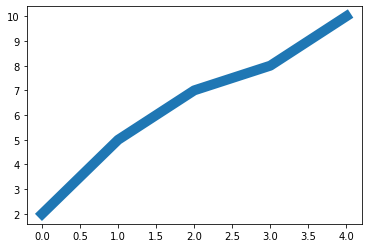

In [14]:
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10) # 设置线的粗细参数为10

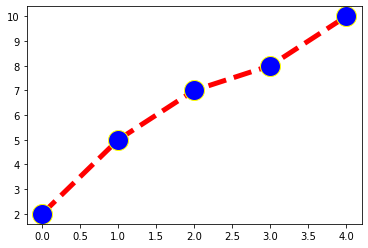

In [15]:
plt.plot(x,y, linewidth=5, linestyle='dashed', color='red', marker='o', markersize=20,markeredgecolor='yellow', markerfacecolor='blue') 
# 设置线的:样式为虚线,颜色参数为 'red', 点的标记为圆形,标记的大小为20, 标记的边缘颜色为黄色,填充色为蓝色
#plt.show() #当注释掉前边代码的时候,输出会有这样的提示: [<matplotlib.lines.Line2D at 0x7f35512f4a30>]

In [23]:
plt.plot??

##### 2) **通过获得线对象，对线对象进行设置**

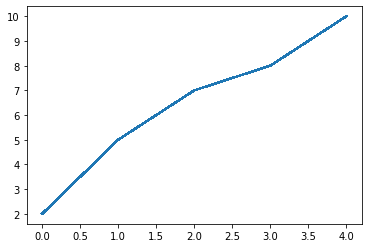

In [16]:
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-') # 为什么要有逗号? 
# ax.plot()和plt.plot()都会返回一个只有一个元素的list
# 通过在赋值时加一个逗号，可以让Python把返回值unpack，并把解包后得到的每一个值按顺序赋给左侧对应的变量。
#line, = plt.plot(x, y)
#[line] = plt.plot(x, y)
#line = plt.plot(x, y)[0]
#三者本质上是等价的,具体可以参考这篇回答，讲解的很好 
#x, = … - is this trailing comma the comma operator? 
#https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator 1
line.set_antialiased(False) # 关闭抗锯齿功能

In [17]:
print([x for x in dir(line) if x.startswith('set')])

['set', 'set_aa', 'set_agg_filter', 'set_alpha', 'set_animated', 'set_antialiased', 'set_c', 'set_clip_box', 'set_clip_on', 'set_clip_path', 'set_color', 'set_contains', 'set_dash_capstyle', 'set_dash_joinstyle', 'set_dashes', 'set_data', 'set_drawstyle', 'set_ds', 'set_figure', 'set_fillstyle', 'set_gid', 'set_in_layout', 'set_label', 'set_linestyle', 'set_linewidth', 'set_ls', 'set_lw', 'set_marker', 'set_markeredgecolor', 'set_markeredgewidth', 'set_markerfacecolor', 'set_markerfacecoloralt', 'set_markersize', 'set_markevery', 'set_mec', 'set_mew', 'set_mfc', 'set_mfcalt', 'set_ms', 'set_path_effects', 'set_picker', 'set_pickradius', 'set_rasterized', 'set_sketch_params', 'set_snap', 'set_solid_capstyle', 'set_solid_joinstyle', 'set_transform', 'set_url', 'set_visible', 'set_xdata', 'set_ydata', 'set_zorder']


对比 Line2D 的参数,可以发现,基本上都可以使用 set 方法来重新指定:    
(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)     

作为一个测试,用set方法重新绘制
```python
plt.plot(x,y, linewidth=5, linestyle='dashed', color='red', marker='o', markersize=20,markeredgecolor='yellow', markerfacecolor='blue') 
```

range(0, 5) [2, 5, 7, 8, 10]
<class 'matplotlib.lines.Line2D'>


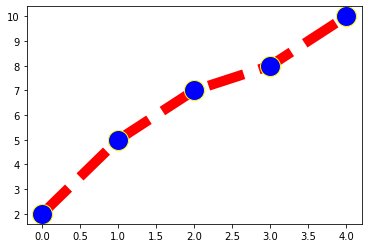

In [19]:
print(x,y)
aline, = plt.plot(x,y,'-')
print(type(aline))
aline.set_xdata(x)
aline.set_ydata(y)
aline.set_color('red')
aline.set_linewidth(10)
aline.set_linestyle('dashed')
aline.set_marker('o')
aline.set_markersize(20)
aline.set_markeredgecolor('yellow')
aline.set_markerfacecolor('blue')

有一点问题: 由于先画了副不相关的图, 导致最后图的刻度并不符合我们要画的图--应该可以通过设置图的刻度来正常显示.

3) **获得线属性，使用setp()函数设置**

[None, None]

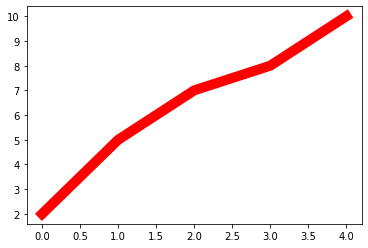

In [20]:
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10)

#### b. 如何绘制lines
**1) 绘制直线line**
常用的方法有两种
+ **pyplot方法绘制**  
+ **Line2D对象绘制**  


##### 1. pyplot方法绘制

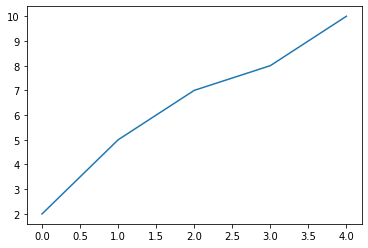

In [21]:
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y)

##### 2. Line2D对象绘制

<class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.lines.Line2D'> <class 'matplotlib.figure.Figure'>


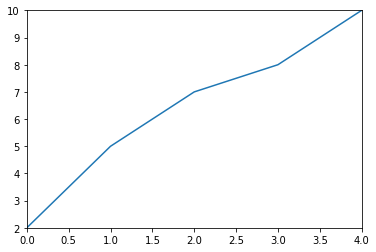

In [22]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

fig = plt.figure()
ax = fig.add_subplot(111)
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x)) 
ax.set_ylim(min(y), max(y)) 
print(type(ax),type(line),type(fig))
plt.show()

注意, set_xlim方法并不是Line2D对象的方法,因此如下代码会报错:

range(0, 5) [2, 5, 7, 8, 10]
<class 'matplotlib.lines.Line2D'>


AttributeError: 'Line2D' object has no attribute 'set_xlim'

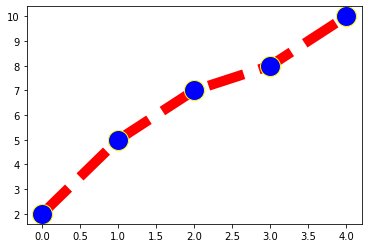

In [24]:
print(x,y)
aline, = plt.plot(x,y,'-')
print(type(aline))
aline.set_xdata(x)
aline.set_ydata(y)
aline.set_color('red')
aline.set_linewidth(10)
aline.set_linestyle('dashed')
aline.set_marker('o')
aline.set_markersize(20)
aline.set_markeredgecolor('yellow')
aline.set_markerfacecolor('blue')
aline.set_xlim(min(x)-1,max(x)+1)
aline.set_ylim(min(y)-1,max(y)+1)

在上例中,由于使用了面向过程的画图方法,没有显式地定义`AxesSubplot`对象,因此也没法调用该对象的set_xlim方法

**2) errorbar绘制误差折线图**  
pyplot里有个专门绘制误差线的功能，通过`errorbar`类实现，它的构造函数： 
  
>```python
matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
```
  
其中最主要的参数是前几个:  
+ **x**：需要绘制的line中点的在x轴上的取值  
+ **y**：需要绘制的line中点的在y轴上的取值  
+ **yerr**：指定y轴水平的误差  
+ **xerr**：指定x轴水平的误差   
+ **fmt**：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’  
+ **ecolor**：指定error bar的颜色  
+ **elinewidth**：指定error bar的线条宽度  


绘制errorbar

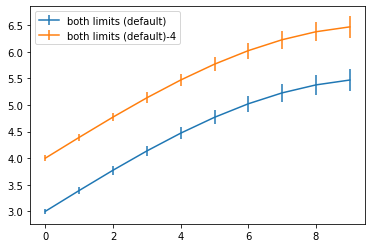

In [25]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)') # label参数为什么没起作用?是因为只有一条线的原因吗?--并不是.
plt.errorbar(x, y + 4, yerr=yerr, label='both limits (default)-4') # label参数是做什么用的?
#对比官方文档中的示例发现,是因为没有用 plt.legend() 把label画出来
plt.legend()
#plt.show()

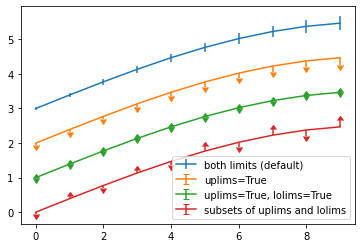

In [26]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')
plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True, label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,label='subsets of uplims and lolims')

plt.legend(loc='lower right')
#plt.show()

In [99]:
plt.errorbar??

### 2. patches
matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist，它的构造函数：  
  
  

>```python
Patch(edgecolor=None, facecolor=None, color=None,
  linewidth=None, linestyle=None, antialiased=None,
  hatch=None, fill=True, capstyle=None, joinstyle=None,
  **kwargs)
```
详细清单见 [matplotlib.patches API](https://matplotlib.org/api/patches_api.html)  


#### a. Rectangle-矩形
`Rectangle`矩形类在官网中的定义是： 通过锚点xy及其宽度和高度生成。
Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高。它的构造函数：

> ```python
class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)```

在实际中最常见的矩形图是hist直方图和bar条形图。  
  
  

**1) hist-直方图**  

>```python
matplotlib.pyplot.hist(x,bins=None,range=None, density=None, bottom=None, histtype='bar', align='mid', log=False, color=None, label=None, stacked=False, normed=None)```
    
下面是一些常用的参数：  
+ **x**: 数据集，最终的直方图将对数据集进行统计
+ **bins**: 统计的区间分布
+ **range**: tuple, 显示的区间，range在没有给出bins时生效
+ **density**: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
+ **histtype**: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
+ **align**: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
+ **log**: bool，默认False,即y坐标轴是否选择指数刻度
+ **stacked**: bool，默认为False，是否为堆积状图

hist绘制直方图

In [27]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
x=np.random.randint(0,100,10) #生成 [0-100) 之间的100个整数作为待绘制的 数据集 
print(min(x),max(x))
print(pd.Series(x).value_counts().sort_index()) # 注意观察, 10的整数倍出现在哪个区间,可以推断出bins分割的是左闭右开区间,和最后一个闭区间

11 97
11    1
12    1
13    1
15    1
26    1
42    1
57    1
62    1
81    1
97    1
dtype: int64


In [28]:
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

(0.0, 5.0)

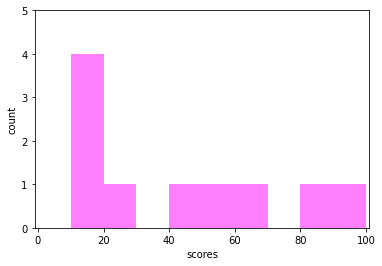

In [29]:
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(-1,101)#设置x轴分布范围 
plt.ylim(0,5)#设置y轴分布范围 
#plt.show()

`Rectangle`矩形类绘制直方图

In [30]:
# 1.准备数据
import pandas as pd
import re
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = np.random.randint(0,100,100) #生成 [0-100) 之间的100个整数
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False,include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)
df_cnt

,index,fenzu,mini,maxi,width
0,"[0, 10)",12,0,10,10
1,"[10, 20)",8,10,20,10
2,"[20, 30)",10,20,30,10
3,"[30, 40)",9,30,40,10
4,"[40, 50)",10,40,50,10
5,"[50, 60)",8,50,60,10
6,"[60, 70)",13,60,70,10
7,"[70, 80)",7,70,80,10
8,"[80, 90)",11,80,90,10
9,"[90, 100)",12,90,100,10


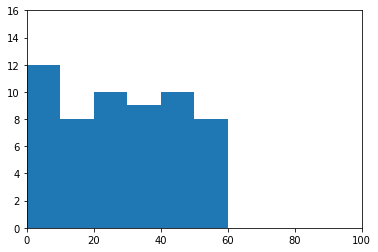

In [31]:
#用Rectangle把hist绘制出来--OO模式
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
#rect1 = plt.Rectangle((0,0),10,10)
#ax1.add_patch(rect)

#ax2 = fig.add_subplot(212)
for i in df_cnt.index[:6]:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
#rect2 = plt.Rectangle((10,0),10,5)
    ax1.add_patch(rect)
#ax1.add_patch(rect2)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
plt.show()

通过上述代码的测试和观察发现, 上述绘制方式是逐个绘制矩形来实现直方图的.

**2) bar-柱状图**   
  
>```python
matplotlib.pyplot.bar(left, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)``` 

下面是一些常用的参数：    
+ **left**：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串--本质上是作为分类变量使用的  
+ **height**：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；  
+ **alpha**：透明度，值越小越透明  
+ **width**：为柱形图的宽度，一般这是为0.8即可；  
+ **color或facecolor**：柱形图填充的颜色；  
+ **edgecolor**：图形边缘颜色   
+ **label**：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签    

bar绘制柱状图

<BarContainer object of 16 artists>

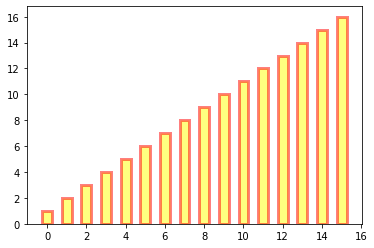

In [32]:
import matplotlib as mpl
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3)
#linewidth(lw)参数设置直方图的边框宽度

`Rectangle`矩形类绘制柱状图

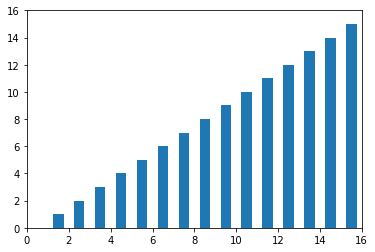

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect =  plt.Rectangle((i+0.25,0),0.5,i)
    ax1.add_patch(rect) #OO模式下,用该命令为 ax1 添加矩形,从而逐个绘制直方图的矩形
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16)
plt.show()

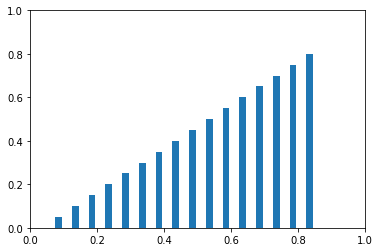

In [34]:
# 改为面向过程模式 该如何实现? 
# 暂时不知道在面向过程的模式下如何调整刻度范围,因此将原始数据缩小显示了.
for i in range(1,17):
    plt.gca().add_patch(plt.Rectangle((i/20+0.025,0),0.02,i/20))


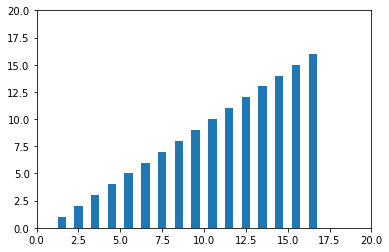

In [35]:
# 改为面向过程模式 该如何实现? 
# 使用 plt.xlim 方法设置显示的刻度
for i in range(1,17):
    plt.gca().add_patch(plt.Rectangle((i+0.25,0),0.5,i))
    plt.xlim(0,20)
    plt.ylim(0,20)


#### b. Polygon-多边形
matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：
  
>```python
class matplotlib.patches.Polygon(xy, closed=True, **kwargs)  ```
  
xy是一个N×2的numpy array，为多边形的顶点。  
closed为True则指定多边形将起点和终点重合从而显式关闭多边形。  


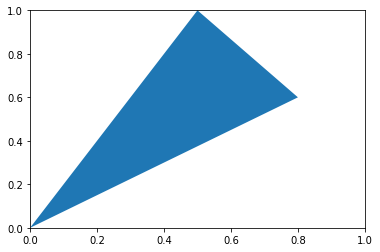

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
t =  plt.Polygon(np.array([[0,0,],[0.5,1],[0.8,0.6]]))
ax1.add_patch(t) 

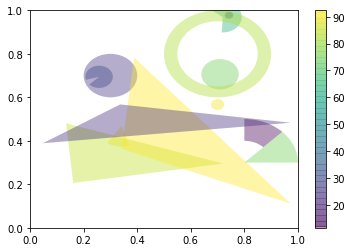

In [41]:
#官网上的示例
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

matplotlib.patches.Polygon类中常用的是fill类，它是基于xy绘制一个填充的多边形，它的定义：

>```python
matplotlib.pyplot.fill(*args, data=None, **kwargs)```

参数说明 : 关于x、y和color的序列，其中color是可选的参数，每个多边形都是由其节点的x和y位置列表定义的，后面可以选择一个颜色说明符。您可以通过提供多个x、y、[颜色]组来绘制多个多边形。

fill绘制图形

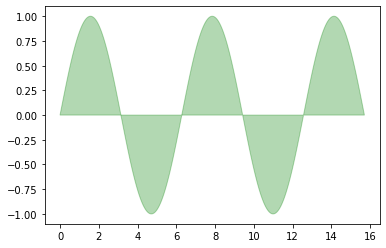

In [45]:
import matplotlib.pyplot as plt
x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color = "g", alpha = 0.3) #alpha 参数设置透明度,范围[0,1],值越大越不透明

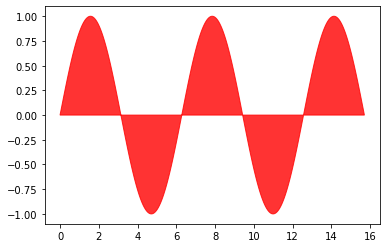

In [46]:
plt.fill(x, y1, color = "r", alpha = 0.8) #alpha 参数设置透明度,范围[0,1],值越大越不透明

#### c. Wedge-契形
matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：

>```python
class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)  ```
  
一个Wedge-契形 是以坐标x,y为中心，半径为r，从θ1扫到θ2(单位是度)。  
如果宽度给定，则从内半径r -宽度到外半径r画出部分楔形。wedge中比较常见的是绘制饼状图。  
  

matplotlib.pyplot.pie语法：  
>```python
matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)```
  
制作数据x的饼图，每个楔子的面积用x/sum(x)表示。    
其中最主要的参数是前4个：  
+ **x**：契型的形状，一维数组。
+ **explode**：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。  
+ **labels**：用于指定每个契型块的标记，取值是列表或为None。  
+ **colors**：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。  
+ **startangle**：饼状图开始的绘制的角度。   

#### pie绘制饼状图

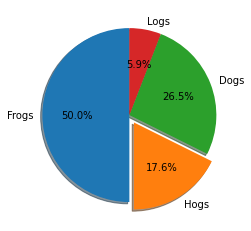

In [261]:
# OO 模式
import matplotlib.pyplot as plt 
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10] 
sizes = [85, 30, 45, 10] #修改数值使得和不为100, 当ax1.axis('equal') 时, 仍能够绘制一个完整的饼,按真实比例显示
explode = (0, 0.1, 0, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
#ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
ax1.axis() #并未看出有什么区别
plt.show()

In [255]:
ax1.axis??

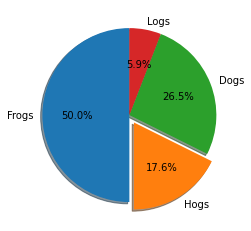

In [262]:
# 面向对象模式
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.show()

#### wedge绘制饼图

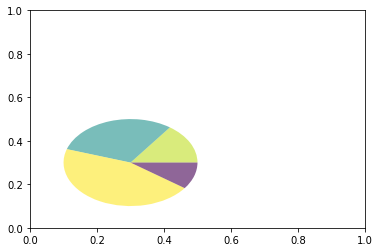

In [264]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

fig = plt.figure()
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.3, 0.3), .2, 0, 54),             # Full circle
    Wedge((0.3, 0.3), .2, 54, 162),  # Full ring
    Wedge((0.3, 0.3), .2, 162, 324),              # Full sector
    Wedge((0.3, 0.3), .2, 324, 360),  # Ring sector
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.6)
p.set_array(colors)
ax1.add_collection(p)
plt.show()

In [265]:
Wedge??

#### 学习笔记:
通过画楔形来画饼图的方式,关键是保证楔形逐个相接:   
Wedge的第一个参数传入的是楔形(扇形)的圆心,第二个参数是半径,然后两个参数分别是扇形的起始和终止角度.   
在逐个画楔形的过程中,保证下一个楔形的起始角度等于前一个楔形的终止角度,则可以画出一个完整且不重叠的圆盘.

### 3. collections
collections类是用来绘制一组对象的集合，collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。其中比较常用的就是散点图，它是属于PathCollection子类，scatter方法提供了该类的封装，根据x与y绘制不同大小或颜色标记的散点图。 它的构造方法：
  
>```python
Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs) ```
      
      
其中最主要的参数是前5个：  
+ **x**：数据点x轴的位置  
+ **y**：数据点y轴的位置  
+ **s**：尺寸大小  
+ **c**：可以是单个颜色格式的字符串，也可以是一系列颜色  
+ **marker**: 标记的类型  


#### scatter绘制散点图

In [269]:
plt.scatter??

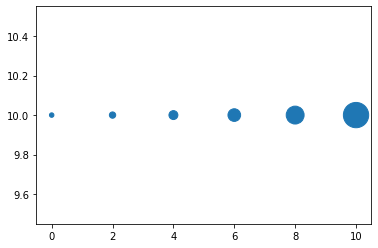

In [267]:
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 
plt.scatter(x,y,s=s) 
plt.show()

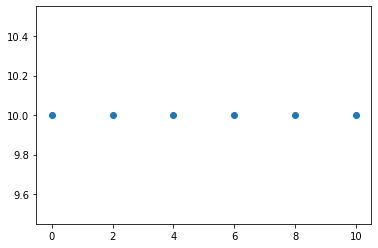

In [268]:
plt.scatter(x,y)

#### 学习笔记:
观察发现: 前两个等长的list参数实际上相当于zip之后作为散点的坐标,第三个参数则是散点的大小--这里的量纲似乎是像素?

In [284]:
# 和 scatter 类似的其他子类型
print([x for x in dir(plt) if not x.startswith('_') ])# 面向过程模式
print([x for x in dir(ax) if not x.startswith('_') ]) # OO模式下, Axes 对象的属性方法

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotTool', 'Text', 'TickHelper', 'Widget', 'acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axline', 'axvline', 'axvspan', 'bar', 'barbs', 'barh', 'bone', 'box', 'boxplot', 'broken_barh', 'cbook', 'cla', 'clabel', 'clf', 'clim', 'close', 'cm', 'cohere', 'colorbar', 'colormaps', 'connect', 'contour', 'contourf', 'cool', 'copper', 'csd', 'cycler', 'delaxes', 'disconnect', 'docstring', 'draw', 'draw_all', 'draw_if_in

In [283]:
# 待进一步学习.
plt.bar??

### 4. images
images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像，它的构造函数：
>```python
class matplotlib.image.AxesImage(ax, cmap=None, norm=None, interpolation=None, origin=None, extent=None, filternorm=True, filterrad=4.0, resample=False, **kwargs)```
  
imshow根据数组绘制图像
>```python
matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs）```

使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法，具体效果如下。

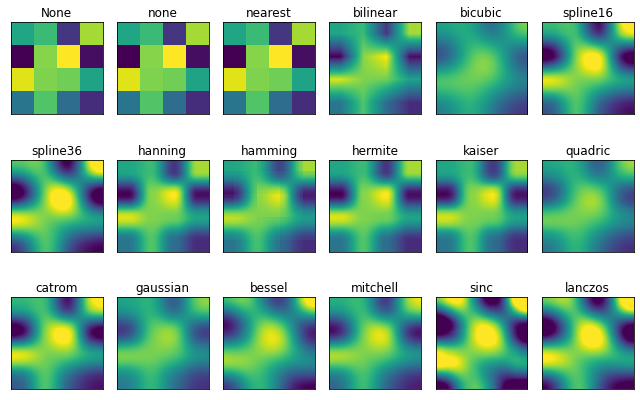

In [285]:
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

## 四、对象容器 - Object container
容器会包含一些`primitives`，并且容器还有它自身的属性。  
比如`Axes Artist`，它是一种容器，它包含了很多`primitives`，比如`Line2D`，`Text`；同时，它也有自身的属性，比如`xscal`，用来控制X轴是`linear`还是`log`的。  

### 1. Figure容器
`matplotlib.figure.Figure`是`Artist`最顶层的`container`-对象容器，它包含了图表中的所有元素。一张图表的背景就是在`Figure.patch`的一个矩形`Rectangle`。  
当我们向图表添加`Figure.add_subplot()`或者`Figure.add_axes()`元素时，这些都会被添加到`Figure.axes`列表中。
#### 学习笔记:
它就是我们的帆布,是所有的绘画的基础.    
就像真实的帆布一样,显然可以自行根据需要定义它的尺寸. 通过传入长度为4的list来定义大小,四个参数分别为:前两个参数代表了矩形左下角的坐标,第三个值是矩形的宽度,第四个值是矩形的高度.

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <matplotlib.axes._axes.Axes object at 0x7f35421243d0>]
Axes(0.1,0.1;0.7x0.3)


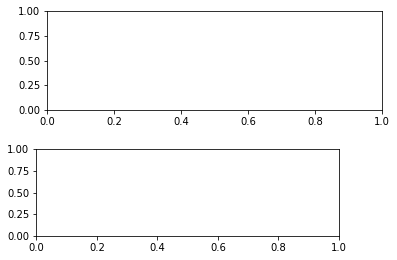

In [296]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
#print(fig) 
print(ax1) 
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的
print(ax2) 

由于`Figure`维持了`current axes`，因此你不应该手动的从`Figure.axes`列表中添加删除元素，而是要通过`Figure.add_subplot()`、`Figure.add_axes()`来添加元素，通过`Figure.delaxes()`来删除元素。但是你可以迭代或者访问`Figure.axes`中的`Axes`，然后修改这个`Axes`的属性。   
  
比如下面的遍历axes里的内容，并且添加网格线：

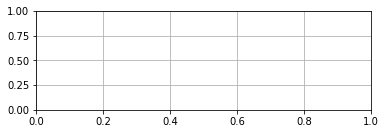

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)
    


`Figure`也有它自己的`text、line、patch、image`。你可以直接通过`add primitive`语句直接添加。但是注意`Figure`默认的坐标系是以像素为单位，你可能需要转换成figure坐标系：(0,0)表示左下点，(1,1)表示右上点。

**Figure容器的常见属性：**  
`Figure.patch`属性：Figure的背景矩形  
`Figure.axes`属性：一个Axes实例的列表（包括Subplot)  
`Figure.images`属性：一个FigureImages patch列表  
`Figure.lines`属性：一个Line2D实例的列表（很少使用）  
`Figure.legends`属性：一个Figure Legend实例列表（不同于Axes.legends)  
`Figure.texts`属性：一个Figure Text实例列表  

### 2. Axes容器

`matplotlib.axes.Axes`是matplotlib的核心。大量的用于绘图的`Artist`存放在它内部，并且它有许多辅助方法来创建和添加`Artist`给它自己，而且它也有许多赋值方法来访问和修改这些`Artist`。  
  
和`Figure`容器类似，`Axes`包含了一个patch属性，对于笛卡尔坐标系而言，它是一个`Rectangle`；对于极坐标而言，它是一个`Circle`。这个patch属性决定了绘图区域的形状、背景和边框。

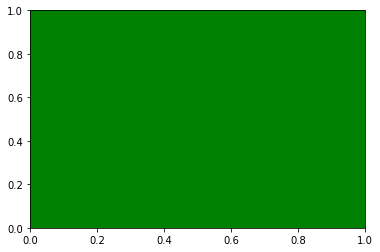

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

`Axes`有许多方法用于绘图，如`.plot()、.text()、.hist()、.imshow()`等方法用于创建大多数常见的`primitive`(如`Line2D，Rectangle，Text，Image`等等）。在`primitives`中已经涉及，不再赘述。   
  
Subplot就是一个特殊的Axes，其实例是位于网格中某个区域的Subplot实例。其实你也可以在任意区域创建Axes，通过Figure.add_axes([left,bottom,width,height])来创建一个任意区域的Axes，其中left,bottom,width,height都是[0—1]之间的浮点数，他们代表了相对于Figure的坐标。

你不应该直接通过`Axes.lines`和`Axes.patches`列表来添加图表。因为当创建或添加一个对象到图表中时，`Axes`会做许多自动化的工作:  
它会设置Artist中figure和axes的属性，同时默认Axes的转换；  
它也会检视Artist中的数据，来更新数据结构，这样数据范围和呈现方式可以根据作图范围自动调整。  
  
你也可以使用Axes的辅助方法`.add_line()`和`.add_patch()`方法来直接添加。  

另外Axes还包含两个最重要的Artist container：

`ax.xaxis`：XAxis对象的实例，用于处理x轴tick以及label的绘制  
`ax.yaxis`：YAxis对象的实例，用于处理y轴tick以及label的绘制  
会在下面章节详细说明。

**Axes容器**的常见属性有：  
`artists`:    Artist实例列表
`patch`:     Axes所在的矩形实例
`collections`: Collection实例
`images`:    Axes图像
`legends`:	  Legend 实例
`lines`:	  Line2D 实例
`patches`:	  Patch 实例
`texts`:	  Text 实例
`xaxis`:	  matplotlib.axis.XAxis 实例
`yaxis`:	  matplotlib.axis.YAxis 实例

### 3. Axis容器

`matplotlib.axis.Axis`实例处理`tick line`、`grid line`、`tick label`以及`axis label`的绘制，它包括坐标轴上的刻度线、刻度`label`、坐标网格、坐标轴标题。通常你可以独立的配置y轴的左边刻度以及右边的刻度，也可以独立地配置x轴的上边刻度以及下边的刻度。

刻度包括主刻度和次刻度，它们都是Tick刻度对象。  
  
`Axis`也存储了用于自适应，平移以及缩放的`data_interval`和`view_interval`。它还有Locator实例和Formatter实例用于控制刻度线的位置以及刻度label。

每个Axis都有一个`label`属性，也有主刻度列表和次刻度列表。这些`ticks`是`axis.XTick`和`axis.YTick`实例，它们包含着`line primitive`以及`text primitive`用来渲染刻度线以及刻度文本。

刻度是动态创建的，只有在需要创建的时候才创建（比如缩放的时候）。Axis也提供了一些辅助方法来获取刻度文本、刻度线位置等等：  
常见的如下：

array([-0.2,  4.2])

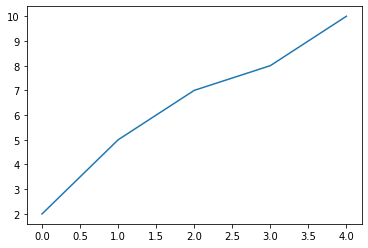

In [298]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔

下面的例子展示了如何调整一些轴和刻度的属性(忽略美观度，仅作调整参考)：  

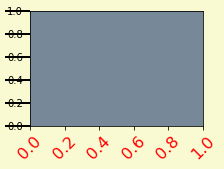

In [299]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_color('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

plt.show()

### 4. Tick容器

`matplotlib.axis.Tick`是从`Figure`到`Axes`到`Axis`到`Tick`中最末端的容器对象。  
`Tick`包含了`tick`、`grid line`实例以及对应的`label`。 
  
所有的这些都可以通过`Tick`的属性获取，常见的`tick`属性有     
`Tick.tick1line`：Line2D实例  
`Tick.tick2line`：Line2D实例  
`Tick.gridline`：Line2D实例  
`Tick.label1`：Text实例  
`Tick.label2`：Text实例  
  
y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。   
x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。  

下面的例子展示了，如何将Y轴右边轴设为主轴，并将标签设置为美元符号且为绿色：

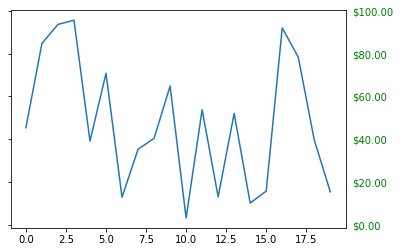

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()

## 思考题
1. primitives 和 container的区别和联系是什么？
2. 四个容器的联系和区别是么？他们分别控制一张图表的哪些要素？
答:
Figure就是帆布,可以理解为绘图区域(超过该区域就不能被显示了);
Axes则是在帆布上画个框,然后把后续的绘画放在框里显示.当然也可以把帆布分割成多个框,然后分别在每个框里绘制不同的画,类似于四个漫画之类的.
Axis则是坐标轴
Tick是轴,过去的理解,感觉好像只是用来人为指定假的刻度.

## 绘图题

### 1.绘制多个子图
教程中展示的案例都是单一图，请自行创建数据，**画出包含6个子图的线图**，要求：    
子图排布是 2 * 3 （2行 3列）；  
线图可用教程中line2D方法绘制；  
需要设置每个子图的横坐标和纵坐标刻度；    
并设置整个图的标题，横坐标名称，以及纵坐标名称

In [72]:
plt.figure??

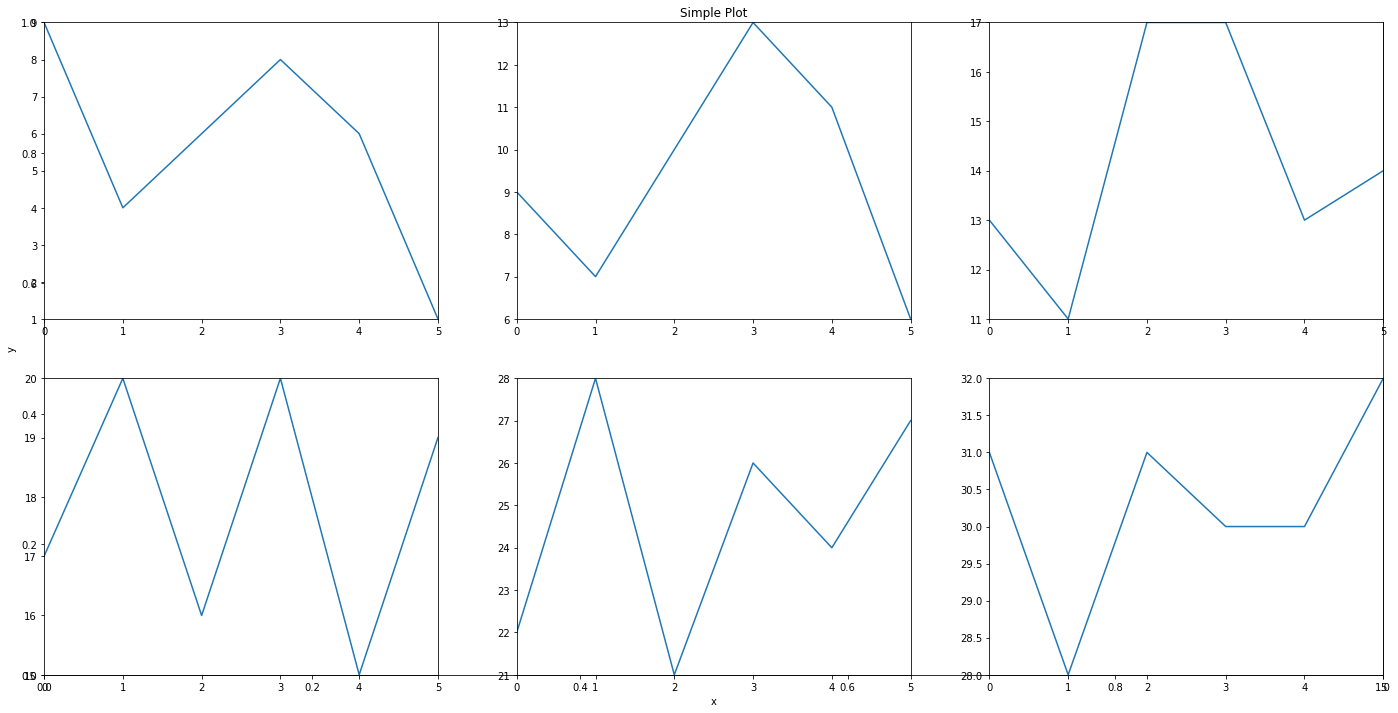

In [74]:
fig = plt.figure(figsize=(24,12))
plt.title("Simple Plot")  
plt.xlabel('x')
plt.ylabel('y')
ax1,ax2,ax3,ax4,ax5,ax6 = fig.add_subplot(2,3,1),fig.add_subplot(2,3,2),fig.add_subplot(2,3,3),fig.add_subplot(2,3,4),fig.add_subplot(2,3,5),fig.add_subplot(2,3,6)
x=range(6)
y1=np.random.randint(0,10,6)
y2=np.random.randint(5,15,6)
y3=np.random.randint(10,20,6)
y4=np.random.randint(15,25,6)
y5=np.random.randint(20,30,6)
y6=np.random.randint(25,35,6)
l1,l2,l3,l4,l5,l6 = Line2D(x, y1),Line2D(x, y2),Line2D(x, y3),Line2D(x, y4),Line2D(x, y5),Line2D(x, y6)
ax1.add_line(l1)
ax1.set_xlim(min(x), max(x)) 
ax1.set_ylim(min(y1), max(y1)) 
ax2.add_line(l2)
ax2.set_xlim(min(x), max(x)) 
ax2.set_ylim(min(y2), max(y2)) 
ax3.add_line(l3)
ax3.set_xlim(min(x), max(x)) 
ax3.set_ylim(min(y3), max(y3)) 
ax4.add_line(l4)
ax4.set_xlim(min(x), max(x)) 
ax4.set_ylim(min(y4), max(y4)) 
ax5.add_line(l5)
ax5.set_xlim(min(x), max(x)) 
ax5.set_ylim(min(y5), max(y5)) 
ax6.add_line(l6)
ax6.set_xlim(min(x), max(x)) 
ax6.set_ylim(min(y6), max(y6)) 
plt.show()

### 2. 分别用一组长方形柱和填充面积的方式模仿画出下图
函数 y = -1 * (x - 2) * (x - 8) +10 在区间[2,9]的积分面积
![](https://img-blog.csdnimg.cn/20201126105910781.png)
![](https://img-blog.csdnimg.cn/20201126105910780.png)

[10.         11.04470743 12.02498356 12.9408284  13.79224195 14.57922419
 15.30177515 15.95989481 16.55358317 17.08284024 17.54766601 17.94806049
 18.28402367 18.55555556 18.76265615 18.90532544 18.98356345 18.99737015
 18.94674556 18.83168968 18.6522025  18.40828402 18.09993425 17.72715319
 17.28994083 16.78829717 16.22222222 15.59171598 14.89677844 14.1374096
 13.31360947 12.42537804 11.47271532 10.4556213   9.37409599  8.22813938
  7.01775148  5.74293228  4.40368179  3.        ]


<BarContainer object of 40 artists>

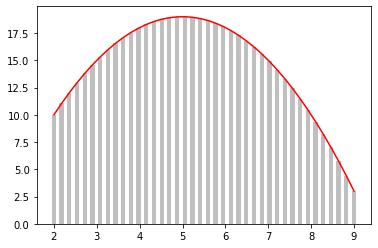

In [58]:
#1
x = np.linspace(2, 9 , 40) 
y = -1 * (x - 2) * (x - 8) +10 
print(y)

plt.plot(x,y,color='red')
plt.bar(x, y, alpha=0.5, width=0.1, color='grey', edgecolor=None, label='The First Bar', lw=3)
#linewidth(lw)参数设置直方图的边框宽度

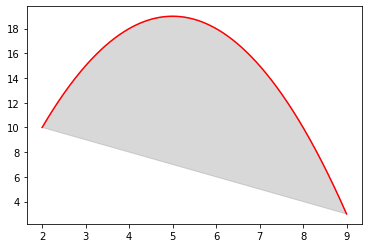

In [61]:
# 2
x = np.linspace(2, 9 , 1000) 
y = -1 * (x - 2) * (x - 8) +10 
plt.plot(x,y,color='red')
plt.fill(x, y, color = "grey", alpha = 0.3) #alpha 参数设置透明度,范围[0,1],值越大越不透明

## 参考资料
[1. matplotlib设计的基本逻辑](https://zhuanlan.zhihu.com/p/32693665)  
[2. matplotlib.artist api](https://matplotlib.org/api/artist_api.html)  
[3. matplotlib官方教程](https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py)  
[4. AI算法工程师手册](https://www.bookstack.cn/read/huaxiaozhuan-ai/spilt.2.333f5abdbabf383d.md)  